# DS 301 Lab - 2
# Classification

A large portion of the code & theory has been taken from the book - 
Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems by A. Geron

### Instructions - <br>
1. Please go over the sample code shown below and use it as reference for your class project <br>
2. Perform classification on the credit risk dataset to ascertain whether a particular person would be deemed to have a good/bad credit rating <br>
3. The dataset can be downloaded from here - https://storage.googleapis.com/kaggle-forum-message-attachments/237294/7771/german_credit_data.csv <br>
4. We expect you to use any three of these classifiers - <br>
    4.1 Naive Bayes Algorithm <br>
    4.2 Decision Tree Algorithm <br>
    4.3 KNN <br>
    4.4 LogisticRegression <br>
    4.5 SGD <br>
5. In order to evaluate these classifiers, please show - <br>
    5.1 Cross Validation Score <br>
    5.2 Confusion Matrix <br>
    5.3 Precision Score <br>
    5.4 Recall Score <br>
    5.5 F1 Score <br>
6. Try to improve your model accuracy by performing Feature Engineering and Tuning your parameters <br>
    6.1 Try to add each of the categorical features to the model, by One-hot encoding <br>
    6.2 try remove some of your numerical feature that has a low correlation coefficient <br>
    6.3 Re-evaluate your model on step 5 <br>
    

    
    
    
    

## MNIST Dataset

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784', version=1) 
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

#### Array Shapes

In [2]:
X, y = mnist["data"], mnist["target"] 
print("X.shape=",X.shape)
print("y.shape=",y.shape)

X.shape= (70000, 784)
y.shape= (70000,)


#### Plotting an image from within the dataset

In [3]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
y[0]

<Figure size 640x480 with 1 Axes>

'5'

#### Converting the label from string to integer

In [4]:
y = y.astype(np.uint8)

#### Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

#### Training a SGDClassifier

In [6]:
y_train_5 = (y_train == 5)  # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

In [7]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
sgd_clf.predict([some_digit])

array([ True])

### Performance Measures

#### 1. Cross Validation

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy") 

array([0.95035, 0.96035, 0.9604 ])

In [10]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
            pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool) 
        
    

In [11]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy") 

array([0.91125, 0.90855, 0.90915])

#### 2. Confusion Matrix

In [12]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [13]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

#### 3. Precision and Recall

In [14]:
from sklearn.metrics import precision_score, recall_score
print("Precision Score =",precision_score(y_train_5, y_train_pred))
print("Recall Score =",recall_score(y_train_5, y_train_pred))


Precision Score = 0.8370879772350012
Recall Score = 0.6511713705958311


#### F1 Score

In [15]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred) 

0.7325171197343846

#### Precision/Recall Tradeoff

In [16]:
y_scores = sgd_clf.decision_function([some_digit]) 
y_scores


array([2164.22030239])

In [17]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

##### Increasing the threshold

In [18]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold) 
y_some_digit_pred

array([False])

##### Finding a 'good' threshold

In [19]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [20]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    

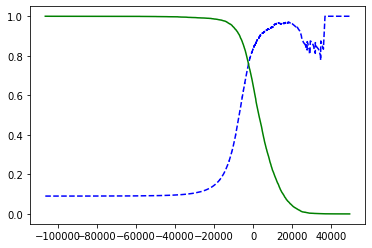

In [21]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

#### ROC Curve

In [22]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) 

##### TPR vs FPR

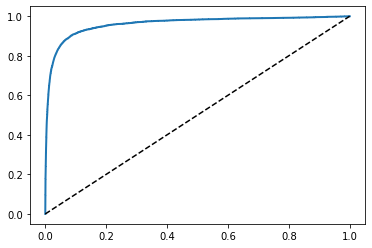

In [23]:
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--')
plot_roc_curve(fpr, tpr) 
plt.show()


##### Area Under Curve

In [24]:
from sklearn.metrics import roc_auc_score 
roc_auc_score(y_train_5, y_scores)


0.9604938554008616